In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('Datawarehouse.csv')

In [0]:
df.head()

,id,date,user,text,retweet,retweet_count,location,source,followers_count,friends_count,favourite_count,post_by
0,1231611279967539200,Sun Feb 23 16:06:26 +0000 2020,journoabubakar,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,True,45,"Sopore, Jammu And Kashmir",Android,1714,222,1329,ShamsIrfan27
1,1231611227513618445,Sun Feb 23 16:06:13 +0000 2020,ThatKashmirGuy,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,True,45,"Kulgam, Jammu And Kashmir",Android,3254,54,208,ShamsIrfan27
2,1231611222891560961,Sun Feb 23 16:06:12 +0000 2020,mittoonkhan,RT @PTIofficial: Arundhati Roy isn’t much wron...,True,18,"Southampton, England",Android,1513,117,369901,PTIofficial
3,1231611181418176512,Sun Feb 23 16:06:02 +0000 2020,abbasqamar_,RT @zari_pakistani: Kashmiris Use Memes to Moc...,True,12,NaN,Web App,342,1987,30411,zari_pakistani
4,1231611142088396800,Sun Feb 23 16:05:53 +0000 2020,LoverPakArmy,RT @Husnain4s_: 200+ days of lockdown in #Kash...,True,5,FORT OF ISLAM🇵🇰,Android,10801,11249,22886,Husnain4s_


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23402 entries, 0 to 23401
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               23402 non-null  int64 
 1   date             23402 non-null  object
 2   user             23402 non-null  object
 3   text             23402 non-null  object
 4   retweet          23402 non-null  bool  
 5   retweet_count    23402 non-null  int64 
 6   location         16141 non-null  object
 7   source           23402 non-null  object
 8   followers_count  23402 non-null  int64 
 9   friends_count    23402 non-null  int64 
 10  favourite_count  23402 non-null  int64 
 11  post_by          19629 non-null  object
dtypes: bool(1), int64(5), object(6)
memory usage: 2.0+ MB


In [0]:
df.isnull().sum()

id                    0
date                  0
user                  0
text                  0
retweet               0
retweet_count         0
location           7261
source                0
followers_count       0
friends_count         0
favourite_count       0
post_by            3773
dtype: int64

In [0]:
corr = df.corr()
corr

,id,retweet,retweet_count,followers_count,friends_count,favourite_count
id,1.000000,-0.007065,-0.086697,0.025844,0.016923,0.003295
retweet,-0.007065,1.000000,0.104014,-0.065215,0.017770,0.118510
retweet_count,-0.086697,0.104014,1.000000,-0.011118,-0.014106,0.012353
followers_count,0.025844,-0.065215,-0.011118,1.000000,0.053796,-0.003881
friends_count,0.016923,0.017770,-0.014106,0.053796,1.000000,0.216937
favourite_count,0.003295,0.118510,0.012353,-0.003881,0.216937,1.000000


In [0]:
df.drop("id",axis=1,inplace=True)

In [0]:
df.head()

,date,user,text,retweet,retweet_count,location,source,followers_count,friends_count,favourite_count,post_by
0,Sun Feb 23 16:06:26 +0000 2020,journoabubakar,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,True,45,"Sopore, Jammu And Kashmir",Android,1714,222,1329,ShamsIrfan27
1,Sun Feb 23 16:06:13 +0000 2020,ThatKashmirGuy,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,True,45,"Kulgam, Jammu And Kashmir",Android,3254,54,208,ShamsIrfan27
2,Sun Feb 23 16:06:12 +0000 2020,mittoonkhan,RT @PTIofficial: Arundhati Roy isn’t much wron...,True,18,"Southampton, England",Android,1513,117,369901,PTIofficial
3,Sun Feb 23 16:06:02 +0000 2020,abbasqamar_,RT @zari_pakistani: Kashmiris Use Memes to Moc...,True,12,NaN,Web App,342,1987,30411,zari_pakistani
4,Sun Feb 23 16:05:53 +0000 2020,LoverPakArmy,RT @Husnain4s_: 200+ days of lockdown in #Kash...,True,5,FORT OF ISLAM🇵🇰,Android,10801,11249,22886,Husnain4s_


In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['retweet']=le.fit_transform(df['retweet'])
df.head()

,date,user,text,retweet,retweet_count,location,source,followers_count,friends_count,favourite_count,post_by
0,Sun Feb 23 16:06:26 +0000 2020,journoabubakar,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,1,45,"Sopore, Jammu And Kashmir",Android,1714,222,1329,ShamsIrfan27
1,Sun Feb 23 16:06:13 +0000 2020,ThatKashmirGuy,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,1,45,"Kulgam, Jammu And Kashmir",Android,3254,54,208,ShamsIrfan27
2,Sun Feb 23 16:06:12 +0000 2020,mittoonkhan,RT @PTIofficial: Arundhati Roy isn’t much wron...,1,18,"Southampton, England",Android,1513,117,369901,PTIofficial
3,Sun Feb 23 16:06:02 +0000 2020,abbasqamar_,RT @zari_pakistani: Kashmiris Use Memes to Moc...,1,12,NaN,Web App,342,1987,30411,zari_pakistani
4,Sun Feb 23 16:05:53 +0000 2020,LoverPakArmy,RT @Husnain4s_: 200+ days of lockdown in #Kash...,1,5,FORT OF ISLAM🇵🇰,Android,10801,11249,22886,Husnain4s_


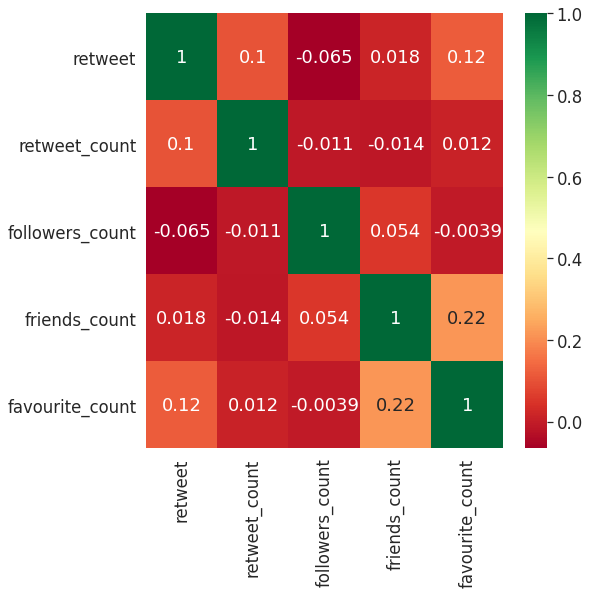

In [0]:
corrmat = df.corr()
top_corr_features = corrmat.index
#sns.set(font_scale=1.5)
plt.figure(figsize=(8,8))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

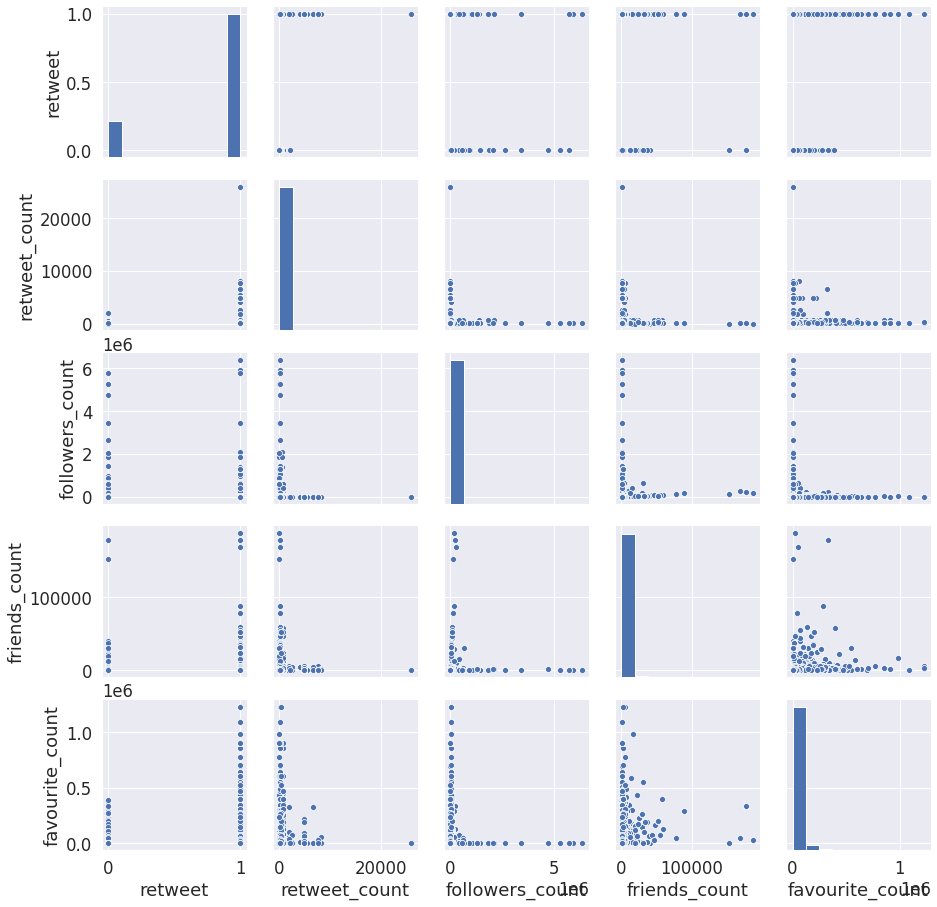

In [0]:
sns.pairplot(df)

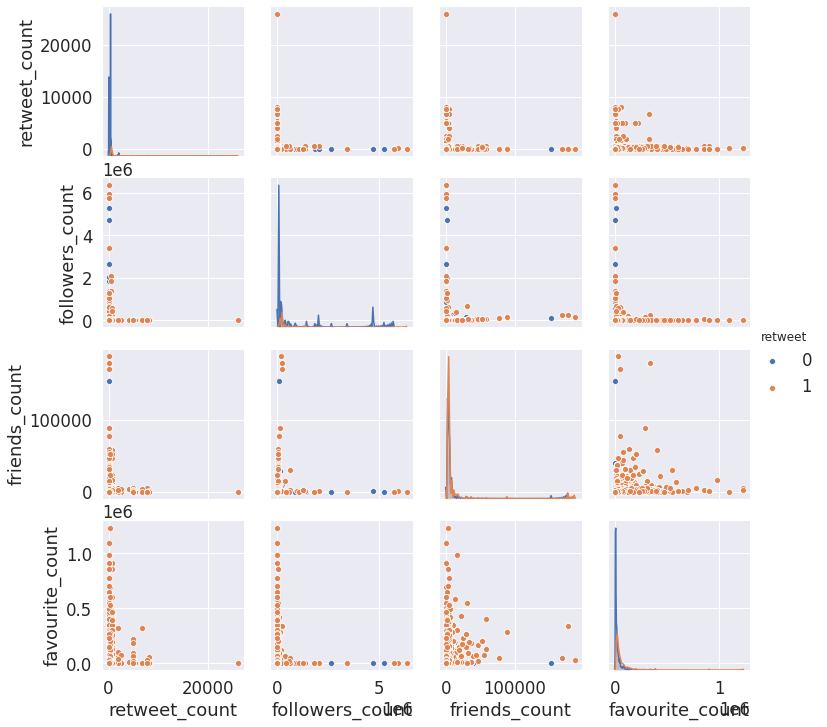

In [0]:
sns.pairplot(df,hue='retweet')

In [0]:
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.bokeh.MultiPlot import MultiPlot

from bokeh.io import output_notebook,show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23402 entries, 0 to 23401
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               23402 non-null  int64 
 1   date             23402 non-null  object
 2   user             23402 non-null  object
 3   text             23402 non-null  object
 4   retweet          23402 non-null  bool  
 5   retweet_count    23402 non-null  int64 
 6   location         16141 non-null  object
 7   source           23402 non-null  object
 8   followers_count  23402 non-null  int64 
 9   friends_count    23402 non-null  int64 
 10  favourite_count  23402 non-null  int64 
 11  post_by          19629 non-null  object
dtypes: bool(1), int64(5), object(6)
memory usage: 2.0+ MB


In [0]:
df.drop("date",axis=1,inplace=True)
df.drop("user",axis=1,inplace=True)
df.drop("text",axis=1,inplace=True)
df.drop("location",axis=1,inplace=True)
df.drop("source",axis=1,inplace=True)
df.drop("post_by",axis=1,inplace=True)

,id,retweet,retweet_count,followers_count,friends_count,favourite_count
0,1231611279967539200,True,45,1714,222,1329
1,1231611227513618445,True,45,3254,54,208
2,1231611222891560961,True,18,1513,117,369901
3,1231611181418176512,True,12,342,1987,30411
4,1231611142088396800,True,5,10801,11249,22886


In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['retweet']=le.fit_transform(df['retweet'])
df.head()

,id,retweet,retweet_count,followers_count,friends_count,favourite_count
0,1231611279967539200,1,45,1714,222,1329
1,1231611227513618445,1,45,3254,54,208
2,1231611222891560961,1,18,1513,117,369901
3,1231611181418176512,1,12,342,1987,30411
4,1231611142088396800,1,5,10801,11249,22886


In [0]:
df.head()

,id,date,user,text,retweet,retweet_count,location,source,followers_count,friends_count,favourite_count,post_by
0,1231611279967539200,Sun Feb 23 16:06:26 +0000 2020,journoabubakar,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,True,45,"Sopore, Jammu And Kashmir",Android,1714,222,1329,ShamsIrfan27
1,1231611227513618445,Sun Feb 23 16:06:13 +0000 2020,ThatKashmirGuy,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,True,45,"Kulgam, Jammu And Kashmir",Android,3254,54,208,ShamsIrfan27
2,1231611222891560961,Sun Feb 23 16:06:12 +0000 2020,mittoonkhan,RT @PTIofficial: Arundhati Roy isn’t much wron...,True,18,"Southampton, England",Android,1513,117,369901,PTIofficial
3,1231611181418176512,Sun Feb 23 16:06:02 +0000 2020,abbasqamar_,RT @zari_pakistani: Kashmiris Use Memes to Moc...,True,12,NaN,Web App,342,1987,30411,zari_pakistani
4,1231611142088396800,Sun Feb 23 16:05:53 +0000 2020,LoverPakArmy,RT @Husnain4s_: 200+ days of lockdown in #Kash...,True,5,FORT OF ISLAM🇵🇰,Android,10801,11249,22886,Husnain4s_


In [0]:
df.drop("date",axis=1,inplace=True)
df.drop("id",axis=1,inplace=True)
df.drop("text",axis=1,inplace=True)
df.drop("location",axis=1,inplace=True)
df.drop("source",axis=1,inplace=True)
df.drop("post_by",axis=1,inplace=True)

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['retweet']=le.fit_transform(df['retweet'])
df.head()

,user,retweet,retweet_count,followers_count,friends_count,favourite_count
0,journoabubakar,1,45,1714,222,1329
1,ThatKashmirGuy,1,45,3254,54,208
2,mittoonkhan,1,18,1513,117,369901
3,abbasqamar_,1,12,342,1987,30411
4,LoverPakArmy,1,5,10801,11249,22886


In [0]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [0]:
df_loc = df['location']

In [0]:
type(df_loc)

pandas.core.series.Series

In [0]:
df_loc.head()

0    Sopore, Jammu And Kashmir
1    Kulgam, Jammu And Kashmir
2         Southampton, England
3                          NaN
4              FORT OF ISLAM🇵🇰
Name: location, dtype: object

In [0]:
loc = pd.read_csv('location - Sheet1 (2).csv')

In [0]:
loc.head()

,location,tweets,code
0,India,9876,IND
1,Pakistan,2836,PAK
2,United Kingdom,886,UK
3,USA,484,USA
4,UAE,206,UAE


In [0]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [0]:
init_notebook_mode(connected=True)

In [0]:
data = dict( type = 'choropleth',
            locations = loc['code'],
            z = loc['tweets'],
            text = loc['location'],
            colorbar = {'title': 'number of tweets'} 
)

In [0]:
layout = dict(geo = dict(scope = 'world'))

In [0]:
col_map = go.Figure(data = [data],layout = layout)

In [0]:
df = pd.read_csv('fs (2).csv')

In [0]:
df.head()

,source,target
0,hasanminhaj,chrissyteigen
1,hasanminhaj,mitchrichmond23
2,hasanminhaj,ninaemlemdi
3,hasanminhaj,Jon_Favreau
4,hasanminhaj,drsanjaygupta


In [0]:
import networkx as nx
import operator

In [0]:
G=nx.from_pandas_edgelist(df)

In [0]:
#nodes ranking on basis of betweenness centrality
x=nx.betweenness_centrality(G)
sorted_x=sorted(x.items(),key=operator.itemgetter(1),reverse=True)
print(sorted_x)

[('hasanminhaj', 0.7609133541139945), ('chrissyteigen', 0.0700067734684188), ('TheEllenShow', 0.043922462877106855), ('jimmykimmel', 0.02176666531101136), ('tomhanks', 0.020954428849338808), ('voxdotcom', 0.011088531333010078), ('TVietor08', 0.004684180065892571), ('TiffanyHaddish', 0.003749664779034542), ('BoysClubNY', 0.0036894641717296174), ('gabegundacker', 0.0027603202631398117), ('Casey', 0.002412365666768121), ('patriotact', 0.0023989496178792955), ('drsanjaygupta', 0.00216505609838807), ('BernieSanders', 0.0018988079484462625), ('sethmeyers', 0.0018386314318468537), ('Variety', 0.001803821104506682), ('MrGeorgeWallace', 0.0017827787863026853), ('iamjohnoliver', 0.0016840520751473641), ('SenSanders', 0.0016170532953740005), ('MattGertz', 0.001586149305925721), ('hodakatebi', 0.0014076734494967579), ('SacramentoKings', 0.0013983533870751915), ('joshrogin', 0.001395486754114396), ('AnandWrites', 0.0012282715957665153), ('chancetherapper', 0.0009099076497484434), ('ianbremmer', 0.0

In [0]:
#nodes ranking on basis of degree centrality
y=nx.degree_centrality(G)
sorted_y=sorted(y.items(),key=operator.itemgetter(1),reverse=True)
print(sorted_x)

[('hasanminhaj', 0.7609133541139945), ('chrissyteigen', 0.0700067734684188), ('TheEllenShow', 0.043922462877106855), ('jimmykimmel', 0.02176666531101136), ('tomhanks', 0.020954428849338808), ('voxdotcom', 0.011088531333010078), ('TVietor08', 0.004684180065892571), ('TiffanyHaddish', 0.003749664779034542), ('BoysClubNY', 0.0036894641717296174), ('gabegundacker', 0.0027603202631398117), ('Casey', 0.002412365666768121), ('patriotact', 0.0023989496178792955), ('drsanjaygupta', 0.00216505609838807), ('BernieSanders', 0.0018988079484462625), ('sethmeyers', 0.0018386314318468537), ('Variety', 0.001803821104506682), ('MrGeorgeWallace', 0.0017827787863026853), ('iamjohnoliver', 0.0016840520751473641), ('SenSanders', 0.0016170532953740005), ('MattGertz', 0.001586149305925721), ('hodakatebi', 0.0014076734494967579), ('SacramentoKings', 0.0013983533870751915), ('joshrogin', 0.001395486754114396), ('AnandWrites', 0.0012282715957665153), ('chancetherapper', 0.0009099076497484434), ('ianbremmer', 0.0

In [0]:
#nodes ranking on basis of eigenvector centrality
z=nx.eigenvector_centrality(G)
sorted_z=sorted(z.items(),key=operator.itemgetter(1),reverse=True)
print(sorted_y)

[('hasanminhaj', 1.0), ('chrissyteigen', 0.425), ('TheEllenShow', 0.355), ('jimmykimmel', 0.2625), ('tomhanks', 0.2575), ('voxdotcom', 0.18), ('TVietor08', 0.13), ('TiffanyHaddish', 0.1225), ('BoysClubNY', 0.1125), ('sethmeyers', 0.1075), ('BernieSanders', 0.1), ('gabegundacker', 0.0975), ('MrGeorgeWallace', 0.0975), ('iamjohnoliver', 0.0975), ('joshrogin', 0.095), ('SenSanders', 0.095), ('Variety', 0.095), ('drsanjaygupta', 0.0925), ('Casey', 0.09), ('AnandWrites', 0.09), ('patriotact', 0.08750000000000001), ('MattGertz', 0.08), ('chancetherapper', 0.0725), ('SacramentoKings', 0.0675), ('hodakatebi', 0.0625), ('ianbremmer', 0.0625), ('BergerWorld', 0.0625), ('janellejcomic', 0.06), ('KimKap', 0.0575), ('MsEmmaBowman', 0.0575), ('ringer', 0.0575), ('TheDailyShow', 0.0575), ('JessicaPilot212', 0.0575), ('BRANDONWARDELL', 0.055), ('dopequeenpheebs', 0.0525), ('hodgman', 0.0525), ('BlazerRamon', 0.05), ('robinthede', 0.05), ('rabiasquared', 0.05), ('solomongeorgio', 0.0475), ('dpmeyer', 0

In [0]:
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.bokeh.MultiPlot import MultiPlot

from bokeh.io import output_notebook,show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence

In [0]:
#SIS Model
vm=MultiPlot()

G=nx.from_pandas_edgelist(df,create_using=nx.DiGraph())

model=ep.SISModel(G)
config=mc.Configuration()
#supply the top 5 infected nodes of betweennes centrality 
infected_nodes=['hasanminhaj', 'chrissyteigen', 'TheEllenShow', 'jimmykimmel', 'tomhanks']

config.add_model_parameter("beta",0.05)
config.add_model_parameter("lambda",0.01)
config.add_model_parameter("fraction_infected",0.05)

config.add_model_initial_configuration("Infected",infected_nodes)

  
model.set_initial_status(config)
iterations=model.iteration_bunch(10)
print(model.get_info())

trends=model.build_trends(iterations)
#diffusion trend
p1=DiffusionTrend(model,trends).plot(width=400,height=400)

vm.add_plot(p1)

m=vm.plot()
output_notebook()
show(m)

100%|██████████| 10/10 [00:00<00:00, 547.30it/s]

{'beta': 0.05, 'lambda': 0.01, 'fraction_infected': 0.05, 'tp_rate': 1}


In [0]:
#IC Model
vm=MultiPlot()

G=nx.from_pandas_edgelist(df,create_using=nx.DiGraph())

IDCS=ep.IndependentCascadesModel(G)
config=mc.Configuration()
#supply the top 10 infected nodes of all 3 centralities 1 by 1 
infected_nodes=['hasanminhaj', 'chrissyteigen', 'TheEllenShow', 'jimmykimmel', 'tomhanks']

config.add_model_initial_configuration("Infected",infected_nodes)

for e in G.edges():
    config.add_edge_configuration("threshold",e,0.5)
  
IDCS.set_initial_status(config)
iterations=IDCS.iteration_bunch(10)
print(IDCS.get_info())

trends=IDCS.build_trends(iterations)
#diffusion trend
p1=DiffusionTrend(IDCS,trends).plot(width=400,height=400)

vm.add_plot(p1)

m=vm.plot()
output_notebook()
show(m)

100%|██████████| 10/10 [00:00<00:00, 1329.20it/s]

{}


In [0]:
#SIR Model
vm=MultiPlot()

G=nx.from_pandas_edgelist(df,create_using=nx.DiGraph())

model=ep.SIRModel(G)
config=mc.Configuration()
#supply the top 10 infected nodes of all 3 centralities 1 by 1 
infected_nodes=['hasanminhaj', 'chrissyteigen', 'TheEllenShow', 'jimmykimmel', 'tomhanks']

config.add_model_parameter("beta",0.05)
config.add_model_parameter("gamma",0.01)
config.add_model_parameter("fraction_infected",0.05)

config.add_model_initial_configuration("Infected",infected_nodes)

  
model.set_initial_status(config)
iterations=model.iteration_bunch(10)
print(model.get_info())

trends=model.build_trends(iterations)
#diffusion trend
p1=DiffusionTrend(model,trends).plot(width=400,height=400)

vm.add_plot(p1)

m=vm.plot()
output_notebook()
show(m)

100%|██████████| 10/10 [00:00<00:00, 500.60it/s]

{'beta': 0.05, 'gamma': 0.01, 'fraction_infected': 0.05, 'tp_rate': 1}
